## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [6]:
import pandas as pd
data = "https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv"
drink = pd.read_csv(data)
drink = drink.drop("total_litres_of_pure_alcohol", axis=1)
drink

,country,beer_servings,spirit_servings,wine_servings
0,Afghanistan,0,0,0
1,Albania,89,132,54
2,Algeria,25,0,14
3,Andorra,245,138,312
4,Angola,217,57,45
...,...,...,...,...
188,Venezuela,333,100,3
189,Vietnam,111,2,1
190,Yemen,6,0,0
191,Zambia,32,19,4


## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [7]:
drink_tidy = drink.melt(
    id_vars=['country'],
    var_name="drink",
    value_name="servings"
)
drink_tidy

,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

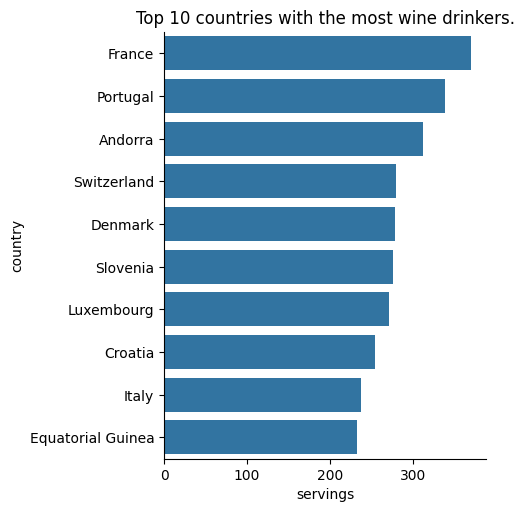

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

drink_tidy["drink"] = drink_tidy.drink.str.replace("_servings", "")
drink_tidy


sns.catplot(
    data=drink_tidy[drink_tidy.drink=="wine"].sort_values(by="servings", ascending=False)[:10],
    y="country",
    x="servings",
    kind="bar",
)
plt.title("Top 10 countries with the most wine drinkers.");

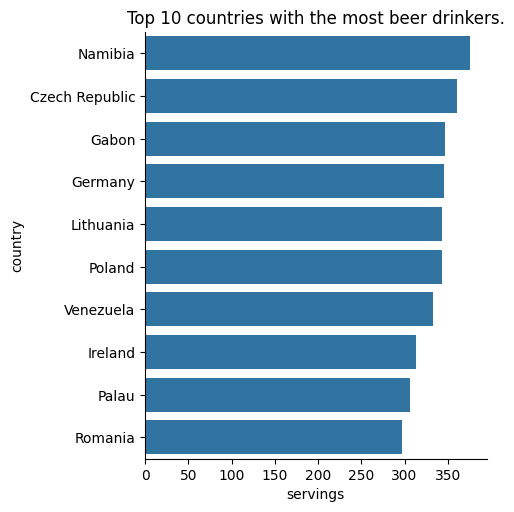

In [13]:
sns.catplot(
    data=drink_tidy[drink_tidy.drink=="beer"].sort_values(by="servings", ascending=False)[:10],
    y="country",
    x="servings",
    kind="bar",
)

plt.title("Top 10 countries with the most beer drinkers.");

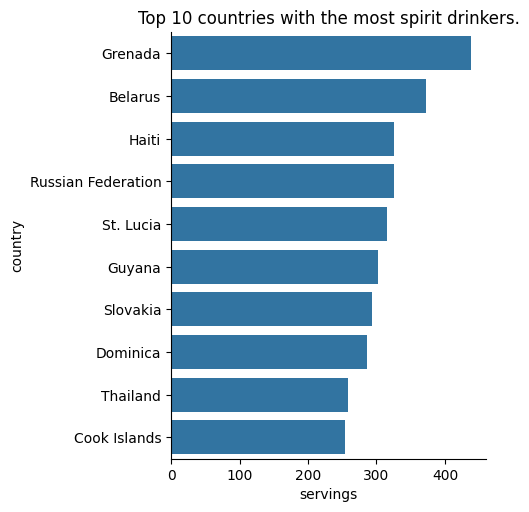

In [14]:
sns.catplot(
    data=drink_tidy[drink_tidy.drink=="spirit"].sort_values(by="servings", ascending=False)[:10],
    y="country",
    x="servings",
    kind="bar",
)

plt.title("Top 10 countries with the most spirit drinkers.");

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [15]:
pd.pivot_table(drink_tidy, values='servings',
               index=['country'],
               columns='drink')

drink,beer,spirit,wine
country,,,
Afghanistan,0.0,0.0,0.0
Albania,89.0,132.0,54.0
Algeria,25.0,0.0,14.0
Andorra,245.0,138.0,312.0
Angola,217.0,57.0,45.0
...,...,...,...
Venezuela,333.0,100.0,3.0
Vietnam,111.0,2.0,1.0
Yemen,6.0,0.0,0.0
